In [3]:
#Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Import CSVs, trim, and prepare dataframes

In [3]:
#Import spending CSVs
CaidAgg_df = pd.read_csv("SpendingData/MEDICAID_AGGREGATE20.CSV")
CaidEnroll_df = pd.read_csv("SpendingData/MEDICAID_ENROLLMENT20.CSV")
CaidPerEnroll_df = pd.read_csv("SpendingData/MEDICAID_PER_ENROLLEE20.CSV")
CareAgg_df = pd.read_csv("SpendingData/MEDICARE_AGGREGATE20.CSV")
CareEnroll_df = pd.read_csv("SpendingData/MEDICARE_ENROLLMENT20.CSV")
CarePerEnroll_df = pd.read_csv("SpendingData/MEDICARE_PER_ENROLLEE20.CSV")
PHIAgg_df = pd.read_csv("SpendingData/PHI_AGGREGATE20.CSV")
PHIEnroll_df = pd.read_csv("SpendingData/PHI_ENROLLMENT20.CSV")
PHIPerEnroll_df = pd.read_csv("SpendingData/PHI_PER_ENROLLEE20.CSV")
#Trim spending CSVs into relavent time period (2010-2020)
CaidAgg_df = CaidAgg_df.dropna(how = 'any')
CaidEnroll_df = CaidEnroll_df.dropna(how = 'any')
CaidPerEnroll_df = CaidPerEnroll_df.dropna(how = 'any')
CareAgg_df = CareAgg_df.dropna(how = 'any')
CareEnroll_df = CareEnroll_df.dropna(how = 'any')
CarePerEnroll_df = CarePerEnroll_df.dropna(how = 'any')
PHIAgg_df = PHIAgg_df.dropna(how = 'any')
PHIEnroll_df = PHIEnroll_df.dropna(how = 'any')
PHIPerEnroll_df = PHIPerEnroll_df.dropna(how = 'any')
#Find wanted columns for the spending CSVs
CSVCols = ["Y"+str(x) for x in range(2010,2018)]
CSVCols.insert(0,'State_Name')
CSVCols.append('Code')
CSVCols.append('Item')
TCaidAgg_df = CaidAgg_df[CSVCols]
TCaidEnroll_df = CaidEnroll_df[CSVCols]
TCaidPerEnroll_df = CaidPerEnroll_df[CSVCols]
TCareAgg_df = CareAgg_df[CSVCols]
TCareEnroll_df = CareEnroll_df[CSVCols]
TCarePerEnroll_df = CarePerEnroll_df[CSVCols]
TPHIAgg_df = PHIAgg_df[CSVCols]
TPHIEnroll_df = PHIEnroll_df[CSVCols]
TPHIPerEnroll_df = PHIPerEnroll_df[CSVCols]
TCaidAgg_df.to_csv("CleanedData/MedicadeAggregate.csv",index = False,header = True)
TCareAgg_df.to_csv("CleanedData/MedicareAggregate.csv",index = False,header = True)
TPHIAgg_df.to_csv("CleanedData/PHIAggregate.csv",index = False,header = True)
TCaidEnroll_df.to_csv("CleanedData/MedicadeEnroll.csv",index = False,header = True)
TCaidPerEnroll_df.to_csv("CleanedData/MedicadePerEnroll.csv",index = False,header = True)
TCareEnroll_df.to_csv("CleanedData/MedicareEnroll.csv",index = False,header = True)
TCarePerEnroll_df.to_csv("CleanedData/MedicarePerEnroll.csv",index = False,header = True)
TPHIEnroll_df.to_csv("CleanedData/PHIEnroll.csv",index = False,header = True)
TPHIPerEnroll_df.to_csv("CleanedData/PHIPerEnroll.csv",index = False,header = True)
#Import Census CSVs

#Trim Census CSVs into relavent time period (2010-2020)

#Import death CSV

#Trim death CSV to relavent time period (2010-2020)

# Create extra Columns needed for data


# Pull and clean the Census spending CSVs

In [10]:
#pull the census data frame
AgeAndSexdf = pd.read_csv("CensusData/AgeAndSex.csv")
AgeAndSexdf.columns

Index(['Acsst5Y2010.S0101-Data.1.2', 'Geography', 'Geographic Area Name',
       'Total  Estimate  Total Population', 'Male  Estimate  Total Population',
       'Female  Estimate  Total Population',
       'Total  Estimate  Age Under 5 Years',
       'Male  Estimate  Age Under 5 Years',
       'Female  Estimate  Age Under 5 Years',
       'Total  Estimate  Age 5 To 9 Years',
       ...
       'Female  Estimate  Summary Indicators Age Dependency Ratio Old-Age Dependency Ratio',
       'Total  Estimate  Summary Indicators Age Dependency Ratio Child Dependency Ratio',
       'Male  Estimate  Summary Indicators Age Dependency Ratio Child Dependency Ratio',
       'Female  Estimate  Summary Indicators Age Dependency Ratio Child Dependency Ratio',
       'Total  Estimate  Percent Imputed Sex',
       'Male  Estimate  Percent Imputed Sex',
       'Female  Estimate  Percent Imputed Sex',
       'Total  Estimate  Percent Imputed Age',
       'Male  Estimate  Percent Imputed Age',
       'Female

In [30]:

TAgeAndSexdf = AgeAndSexdf[["Acsst5Y2010.S0101-Data.1.2","Geographic Area Name","Total  Estimate  Total Population","Total  Estimate  Selected Age Categories 65 Years And Over"]]
TChangeAgeAndSexdf = TAgeAndSexdf.loc[TAgeAndSexdf["Acsst5Y2010.S0101-Data.1.2"]!=2020]
TChangeAgeAndSexdf = TChangeAgeAndSexdf.loc[TAgeAndSexdf["Acsst5Y2010.S0101-Data.1.2"]!=2019]
TChangeAgeAndSexdf = TChangeAgeAndSexdf.loc[TAgeAndSexdf["Acsst5Y2010.S0101-Data.1.2"]!=2018]
TChangeAgeAndSexdf = TChangeAgeAndSexdf.loc[TAgeAndSexdf["Acsst5Y2010.S0101-Data.1.2"]!=2017]
TChangeAgeAndSexdf["Total  Estimate  Selected Age Categories 65 Years And Over"] = round((TChangeAgeAndSexdf["Total  Estimate  Selected Age Categories 65 Years And Over"]/100*TChangeAgeAndSexdf["Total  Estimate  Total Population"]),0)
#TChangeAgeAndSexdf
T2017AgeAndSexdf = TAgeAndSexdf.loc[TAgeAndSexdf["Acsst5Y2010.S0101-Data.1.2"]==2017]
TChangeAgeAndSexdf = pd.concat([TChangeAgeAndSexdf,T2017AgeAndSexdf])
TChangeAgeAndSexdf = TChangeAgeAndSexdf.loc[TChangeAgeAndSexdf['Geographic Area Name']!="Puerto Rico"]
TChangeAgeAndSexdf.to_csv("CleanedData/MedicarePopulation.csv")

# Create graphs for comparison of Medicare, Medicaid, and Private Healthcare

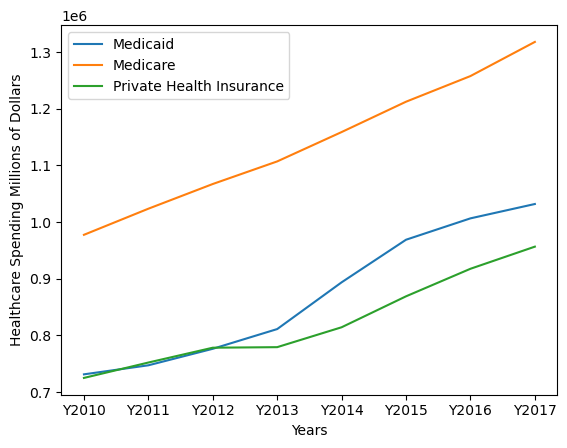

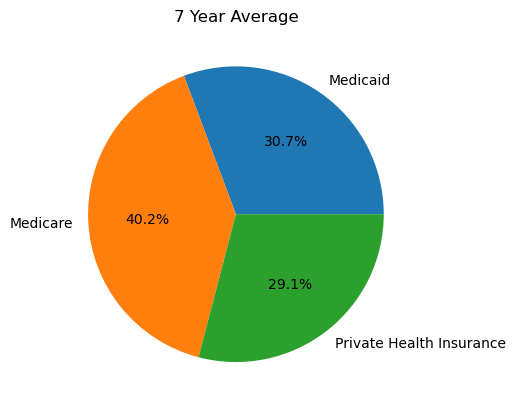

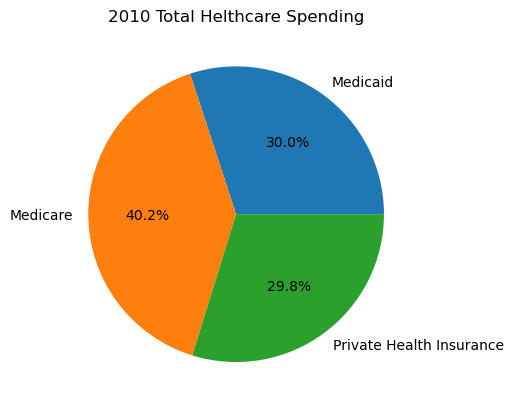

KeyError: 'Y2020'

In [4]:
SumCaidAgg = TCaidAgg_df.sum()
SumCareAgg = TCareAgg_df.sum()
SumPHIAgg = TPHIAgg_df.sum()
SumCaidAgg = SumCaidAgg[["Y"+str(x) for x in range(2010,2018)]]
SumCareAgg = SumCareAgg[["Y"+str(x) for x in range(2010,2018)]]
SumPHIAgg = SumPHIAgg[["Y"+str(x) for x in range(2010,2018)]]
Caid10YAvg = round(SumCaidAgg.mean(),2)
Care10YAvg = round(SumCareAgg.mean(),2)
PHI10YAvg = round(SumPHIAgg.mean(),2)
#Graph the 3 different types of insurance payments over time.
SumCaidAgg.plot(kind = 'line',label = 'Medicaid')
SumCareAgg.plot(kind = 'line',label = 'Medicare')
SumPHIAgg.plot(kind = 'line',label = 'Private Health Insurance')
plt.xlabel('Years')
plt.ylabel('Healthcare Spending Millions of Dollars')
plt.legend(loc = 'best')
plt.savefig(f"Graphs/HealthcareSpendingOverTime")
plt.show()

#Pie graph of 3 10 year Averages
plt.pie([Caid10YAvg,Care10YAvg,PHI10YAvg],labels = ["Medicaid","Medicare","Private Health Insurance"],autopct='%1.1f%%')
plt.title('7 Year Average')
plt.savefig(f"Graphs/10YearSpendingAverage")
plt.show()
plt.pie([SumCaidAgg['Y2010'],SumCareAgg['Y2010'],SumPHIAgg['Y2010']],labels = ["Medicaid","Medicare","Private Health Insurance"],autopct='%1.1f%%')
plt.title('2010 Total Helthcare Spending')
plt.savefig(f"Graphs/2010SpendingPercentage")
plt.show()
plt.pie([SumCaidAgg['Y2020'],SumCareAgg['Y2018'],SumPHIAgg['Y2018']],labels = ["Medicaid","Medicare","Private Health Insurance"],autopct='%1.1f%%')
plt.title('2020 Total Helthcare Spending')
plt.savefig(f"Graphs/2020SpendingPercentage")
plt.show()

# Linreg and Scatterplot Functions

In [ ]:
#Define LinReg Function that will calculate the Linear Regression of 2 sets of data
#Input: takes 2 data series
#Output: an array of the slope, intercept, rvalue, pvalue,stderr,line to print and line equation
def LinReg(xs,ys):
    slope, intercept, rvalue, pvalue, stderr = linregress(xs,ys)
    regvalues = slope*xs+intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    linregs = [slope,intercept,rvalue,pvalue,stderr,regvalues,line_eq]
    return linregs

In [ ]:
#Define ScatPlotandReg creates a scatter plot with a linear Regression show as well as an Rsquared value
#Inputs: takes 2 data series, your x and y coordinates, labels for  the axises and a title
#Output shows and saves a scatterplot
def ScatPlotandReg(xs,ys,xlab,ylab,title,filename):
    reginfo = LineReg(xs,ys)
    print(f"The r^2-value is: {reginfo[2]**2}")
    plt.scatter(xs,ys)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.plot(xs,reginfo[5],color = 'r')
    plt.annotate(reginfo[6],ha = 'left',va = 'top',fontsize=15,color="red")
    plt.savefig(f"Graphs/{filename}")
    plt.show()

In [ ]:
#Define ScatPlotNoReg creates a scatter plot
#Inputs: takes 2 data series, your x and y coordinates, labels for  the axises and a title
#Output shows and saves a scatterplot
def ScatPlotNoReg(xs,ys,xlab,ylab,title,filename):
    plt.scatter(xs,ys)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.savefig(f"Graphs/{filename}")
    plt.show()

# Comparison of Spending and Mortality Rate

In [ ]:
#Select necessary columns and combine on State

** Analysis of Spending and Mortality Rate ** :

# Comparison of Medicare and Age

In [ ]:
#Select necessary columns and combine on State

** Analysis of Medicare and Age ** :

# Comparison of Medicade and Poverty Rate

In [ ]:
#Select necessary columns and combine on State

** Analysis of Medicade and Poverty Rate ** :

# Comparison of Spending and Poverty Rate

In [ ]:
#Select necessary columns and combine on State

** Analysis of Spending and Poverty Rate ** :